In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
def invert_result_func(x_value): return (-w[0]*x_value-w[2])/w[1]

In [344]:
w = np.zeros(3)

f0 = np.array(np.random.normal(loc=0, scale=0.5, size=20).tolist() + np.random.normal(loc=1, scale=0.5, size=10).tolist())
f1 = np.array(np.random.normal(loc=0, scale=0.5, size=20).tolist() + np.random.normal(loc=1, scale=0.5, size=10).tolist())
bias = np.ones(30)
y = np.array([-1]*20 + [1]*10)

print(f'weights: {w}')

df = pd.DataFrame({'f0': f0, 'f1': f1, 'b': bias, 'y': y})
df

weights: [0. 0. 0.]


,f0,f1,b,y
0,-0.138151,-0.702300,1.0,-1
1,-0.935373,0.305120,1.0,-1
2,0.917522,0.024506,1.0,-1
3,0.580272,0.039914,1.0,-1
4,0.118357,0.042935,1.0,-1
5,-0.008473,-0.975415,1.0,-1
6,0.229579,0.661344,1.0,-1
7,-0.295128,0.169308,1.0,-1
8,0.318601,-0.122697,1.0,-1
9,0.144470,0.092778,1.0,-1


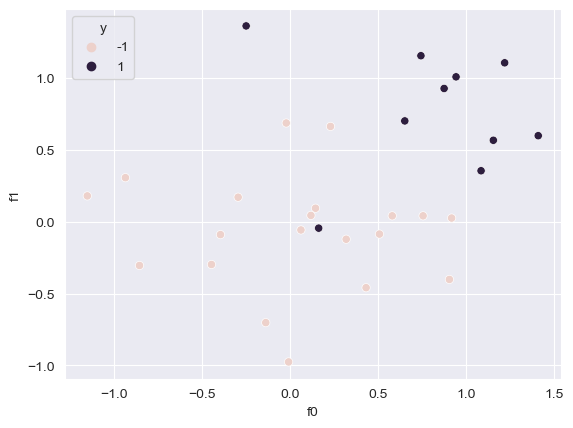

In [345]:
sns.scatterplot(data=df, x='f0', y='f1', hue='y');

In [346]:
for _ in range(300):
    for i_entity in range(len(df)):
        current_entity_vec = df.loc[i_entity, ['f0', 'f1', 'b']].to_numpy()
        y_type_class = df.loc[i_entity, 'y']
        
        dot_product_plus_b = current_entity_vec @ w# + b
        
        
        is_misclassified = (dot_product_plus_b * y_type_class) < 0 or dot_product_plus_b == 0 or -1 < dot_product_plus_b < 1
        
        if is_misclassified:
            rate = 0.1
            
            w[:-1] = w[:-1] + y_type_class*current_entity_vec[:-1]*rate
            w[-1] += y_type_class*rate
            

In [347]:
w

array([ 2.63079606,  3.69639349, -3.1       ])

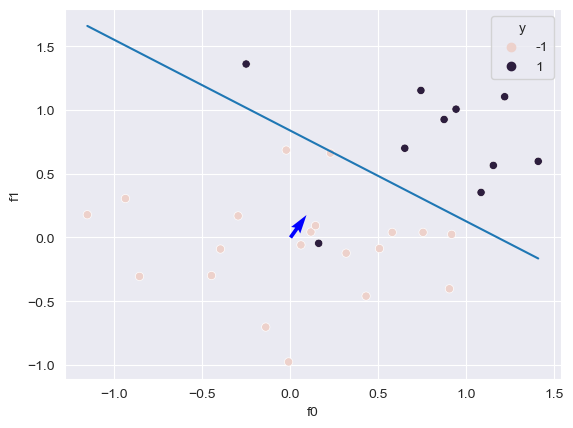

In [348]:
plt.quiver(0, 0, w[0], w[1], color='blue')

x_vec = [df['f0'].min(), df['f0'].max()]
y_vec = [invert_result_func(x_vec[0]), invert_result_func(x_vec[1])]
sns.lineplot(x=x_vec, y=y_vec)

sns.scatterplot(data=df, x='f0', y='f1', hue='y')

plt.show();